In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
jeju = pd.read_csv('/content/제주기후.csv', encoding="CP949")

In [3]:
jeju

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1970-01-01,184,5.3,1.5,10.3
1,1970-01-02,184,6.4,3.2,9.0
2,1970-01-03,184,5.1,3.2,6.6
3,1970-01-04,184,1.1,-2.5,4.2
4,1970-01-05,184,-0.7,-4.6,2.0
...,...,...,...,...,...
18568,2020-11-02,184,15.7,12.8,18.5
18569,2020-11-03,184,13.1,11.8,16.0
18570,2020-11-04,184,12.0,9.2,15.1
18571,2020-11-05,184,14.0,8.2,17.9


In [4]:
jeju.columns = ['날짜', '지점', '평균', '최저', '최고']

In [5]:
jeju

,날짜,지점,평균,최저,최고
0,1970-01-01,184,5.3,1.5,10.3
1,1970-01-02,184,6.4,3.2,9.0
2,1970-01-03,184,5.1,3.2,6.6
3,1970-01-04,184,1.1,-2.5,4.2
4,1970-01-05,184,-0.7,-4.6,2.0
...,...,...,...,...,...
18568,2020-11-02,184,15.7,12.8,18.5
18569,2020-11-03,184,13.1,11.8,16.0
18570,2020-11-04,184,12.0,9.2,15.1
18571,2020-11-05,184,14.0,8.2,17.9


In [6]:
import math
# 원하는 달의 평균 기온
total = 0 
index = 0
divisionValue = 0
for 날짜 in jeju['날짜']:
    날짜구분 = 날짜.split('-')
    if(날짜구분[1] == '08' and int(날짜구분[0]) >= 2000):
        total += jeju['평균'][index]
        divisionValue += 1
    index += 1
total / divisionValue

27.401536098310324

In [7]:
valueArray = [] # 2000 ~ 2020 년 월 평균값을 넣을 배열
total = 0 
index = 0
divisionValue = 0
for Month in range(1,13):
    for 날짜 in jeju['날짜']:
        날짜구분 = 날짜.split('-')
        if(int(날짜구분[1]) == Month and int(날짜구분[0]) >= 2000):
            #print(jeju['날짜'][index], Month)
            total += jeju['평균'][index]
            divisionValue += 1
        index += 1
    monthAverage = total / divisionValue
    index = 0
    total = 0
    divisionValue = 0
    appendValue = "%0.2f" % monthAverage
    valueArray.append(float(appendValue))
valueArray # 월 평균 리스트

[6.06, 6.87, 9.98, 14.29, 18.41, 21.84, 26.28, 27.4, 23.35, 18.75, 13.34, 8.18]

In [8]:
칼럼 = []
일교차 = [] # 1 - 12, 2 - 1, .....순서대로 연교차를 담는 배열 
for i in range(len(valueArray)):
    # 월교차 구하기
    Value = valueArray[i]
    subValue = valueArray[i - 1]
    월교차 = Value - subValue
    월교차편집 = "%0.2f" % 월교차
    일교차.append(float(월교차편집))
    # 편의성 글
    ValueIndex = valueArray.index(Value) + 1
    subValueIndex = valueArray.index(subValue) + 1
    #print(str(ValueIndex) + "월", "-", str(subValueIndex) + "월", " = ", 일교차[i])
    칼럼.append(str(ValueIndex) + "월" + " - " + str(subValueIndex) + "월")
일교차
칼럼

['1월 - 12월',
 '2월 - 1월',
 '3월 - 2월',
 '4월 - 3월',
 '5월 - 4월',
 '6월 - 5월',
 '7월 - 6월',
 '8월 - 7월',
 '9월 - 8월',
 '10월 - 9월',
 '11월 - 10월',
 '12월 - 11월']

In [9]:
월교차
#한글폰트 설치하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


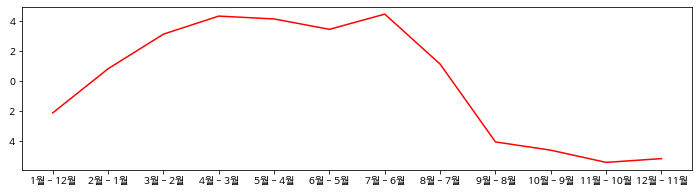

In [18]:

#나눔 글꼴 설치하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(12, 3))
plt.plot(칼럼, 일교차, c = 'red')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


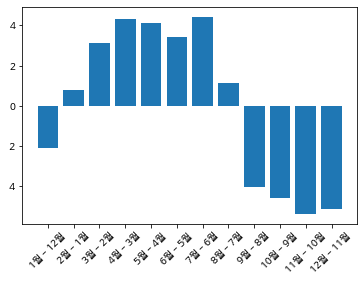

In [15]:
월교차 = pd.DataFrame(일교차, index = 칼럼, columns = ['월교차'])
plt.bar(월교차.index, 월교차['월교차'])
plt.xticks(rotation = 45)
plt.show()